In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) #mount안에 경로를 던져준다
# 기본경로 : /content/drive/MyDrive/Colab Notebooks

Mounted at /content/drive


In [ ]:
#한글폰트설치(런타임 재시작필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt

%matplotlib inline

#폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 1번(두번째) 인덱스를 열 이름으로 사용
population = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/numpy_pandas+matpolib/05. population_raw_data.xlsx', header=1)

population.ffill(inplace=True)                    # 결측치 전 행의 값으로 채움 .
#population.fillna(method='pad', inplace=True)    # -> FutureWarning
population.rename(columns = {'행정구역(동읍면)별(1)':'광역시도',
                              '행정구역(동읍면)별(2)':'시도',
                              '계':'인구수'}, inplace=True)         # 열 이름 바꿈
population = population[(population['시도'] != '소계')]             # '시도' 열 중 '소계'는 제외하고 선택

population

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,제주특별자치도,제주시,남자인구수 (명),235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
842,제주특별자치도,제주시,여자인구수 (명),234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
843,제주특별자치도,서귀포시,총인구수 (명),170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
844,제주특별자치도,서귀포시,남자인구수 (명),86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0


In [ ]:
population.is_copy = False  # 안써도 됨.  warning 방지
population.rename(columns = {'항목':'구분'}, inplace=True)                # 열 이름 변경 : 항목 -> 구분

population.loc[population['구분'] == '총인구수 (명)', '구분'] = '합계'    # '구분' 열에서 값이  총인구수 (명) 인 행의 값을 '합계' 로 변경
population.loc[population['구분'] == '남자인구수 (명)', '구분'] = '남자'  # '구분' 열에서 값이  남자인구수 (명) 인 행의 값을 '남자' 로 변경
population.loc[population['구분'] == '여자인구수 (명)', '구분'] = '여자'  # '구분' 열에서 값이  여자인구수 (명) 인 행의 값을 '여자' 로 변경

population

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,제주특별자치도,제주시,남자,235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
842,제주특별자치도,제주시,여자,234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
843,제주특별자치도,서귀포시,합계,170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
844,제주특별자치도,서귀포시,남자,86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0


In [ ]:
# 기존 나잇대의 행 합친 새로운 나잇대 열 생성
population['20-39세'] = population['20 - 24세'] + population['25 - 29세'] + \
population['30 - 34세'] + population['35 - 39세']

population['65세이상'] = population['65 - 69세'] + population['70 - 74세'] + \
population['75 - 79세'] + population['80 - 84세'] + \
population['85 - 89세'] + population['90 - 94세'] + \
population['95 - 99세'] + population['100+']

# 상위 행 10개 출력해보기
population.head(10)

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0
11,서울특별시,중구,여자,63045.0,4074.0,4737.0,5140,4886.0,3286.0,2908.0,2375,1573.0,846.0,337.0,102,109.0,18837.0,11536.0
12,서울특별시,용산구,합계,230241.0,14317.0,16972.0,19032,19127.0,10675.0,9093.0,7477,4553.0,2254.0,916.0,264,315.0,69448.0,35547.0
13,서울특별시,용산구,남자,111601.0,6937.0,8373.0,9455,9434.0,4834.0,3975.0,3094,1739.0,750.0,284.0,102,88.0,34199.0,14866.0
14,서울특별시,용산구,여자,118640.0,7380.0,8599.0,9577,9693.0,5841.0,5118.0,4383,2814.0,1504.0,632.0,162,227.0,35249.0,20681.0
15,서울특별시,성동구,합계,299259.0,20813.0,23383.0,25507,25979.0,12938.0,10734.0,7989,4450.0,1944.0,678.0,209,198.0,95682.0,39140.0


In [ ]:
# 피벗 테이블 생성
pop = pd.pivot_table(
    population, index = ['광역시도', '시도'],   # 광역시도, 시도를 인덱스로 지정
    columns = ['구분'],                         # '구분'을 열이름으로 지정
    values = ['인구수', '20-39세', '65세이상']  # 열 값에 인구수, 20-39, 65세 이상 포함
)

pop

20-39세                        65세이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0  127647.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0  
...            ...       ...  
충청북도 진천군   33563.0   69950.0  
     청원구   93807.0  190813.0  
     청주시  415874.0  835197.0  
     충주시  103473.0  208350.0  
     흥덕구  125916.0  253563.0  

[264 rows x 9 columns]

In [ ]:
pop['소멸비율'] = pop['20-39세','여자'] / (pop['65세이상','합계'] / 2)      #소멸비율 열 추가

pop.head()      # 상위 5개 행 출력

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.226041  
     고성군   14215.0   30114.0  0.707314  
     동해시   46131.0   93297.0  1.289738  
     삼척시   34346.0   69599.0  0.973990  
     속초시   41505.0   81793.0  1.372647

In [ ]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0     # 소멸위기지역 열 추가

pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False

In [ ]:
# 소멸위기지역이 True인 행 중에서 인덱스 레벨이 1인(레벨이 두번째)인 것들 가져옴
pop[pop['소멸위기지역']==True].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [ ]:
pop.reset_index(inplace=True)   # 인덱스를 숫자로 초기화. 광역시도, 시도는 열이름으로 되돌아감

pop.head()

광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False  
3    34346.0   69599.0  0.973990   True  
4    41505.0   81793.0  1.372647  False

In [ ]:
# 리스트 컴프리헨션 : 0부터 열의 길이 만큼 반복문을 돌며 그 열의 레벨 0 + 레벨 1을 리스트로 반환
tmp_coloumns = [pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n]
                for n in range(0,len(pop.columns.get_level_values(0)))
]

pop.columns = tmp_coloumns
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [ ]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      264 non-null    object 
 1   시도        264 non-null    object 
 2   20-39세남자  264 non-null    float64
 3   20-39세여자  264 non-null    float64
 4   20-39세합계  264 non-null    float64
 5   65세이상남자   264 non-null    float64
 6   65세이상여자   264 non-null    float64
 7   65세이상합계   264 non-null    float64
 8   인구수남자     264 non-null    float64
 9   인구수여자     264 non-null    float64
 10  인구수합계     264 non-null    float64
 11  소멸비율      264 non-null    float64
 12  소멸위기지역    264 non-null    bool   
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


In [ ]:
# '시도'의 유일한 값을 array로 반환
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [ ]:
# pop의 길이만큼 None으로 초기화. 도시이름이 들어갈 리스트
si_name = [None] * len(pop)

# 수원~부천까지 시도 지역구 딕셔너리 수동 매핑 (조건부로 처리할 도시명들을 딕셔너리로 지정)
tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'],
'성남':['수정구', '중원구', '분당구'],
'안양':['만안구', '동안구'],
'안산':['상록구', '단원구'],
'고양':['덕양구', '일산동구', '일산서구'],
'용인':['처인구', '기흥구', '수지구'],
'청주':['상당구', '서원구', '흥덕구', '청원구'],
'천안':['동남구', '서북구'],
'전주':['완산구', '덕진구'],
'포항':['남구', '북구'],
'창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'],
'부천':['오정구', '원미구', '소사구']}

In [ ]:
# pop의 모든 인덱스 만큼 반복. 슬라이싱으로 도시의 이름들을 재정립
for n in pop.index:
  if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:         # '광역시도'열의 값의 끝에서 3글자가 '광역시', '특별시', '자치시'로 끝나지 않는다면
    if pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='강원도':          # 광역시도가 '강원도'인 시도 중에서 '시'를 제거한 시도명이 '고성'이면
      si_name[n] = '고성(강원)'                                               # '고성(강원)'이라고 명명한다.
    elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='경상남도':      # 경상남도 고성이면 고성(경남)이라고 명명한다.
      si_name[n] = '고성(경남)'
    else:
      si_name[n] = pop['시도'][n][:-1]                                        # 나머지 시도는 '시'만 뺀다.

    for keys, values in tmp_gu_dict.items():                                # tmp_gu_dict를 순회하면서
      if pop['시도'][n] in values:                                            # pop의 시도 값이 tmp_gu_dict의 values에 포함이 되면
        if len(pop['시도'][n])==2:                                            # 그 중 2글자이면
          si_name[n] = keys + ' ' + pop['시도'][n]                            # si_name을 key+시도명으로 한다. ex : '포항남구'
        elif pop['시도'][n] in ['마산합포구','마산회원구']:                 # 시도 중 '마산합포구' 와 '마산회원구'가 있으면
          si_name[n] = keys + ' ' + pop['시도'][n][2:-1]                      # 앞 두글자 '마산' 다음 글자부터 맨 마지막 '구' 전까지를 붙인다. ex : '창원 합포'
        else:
          si_name[n] = keys + ' ' + pop['시도'][n][:-1]                     # 나머지는 맨마지막 '구'만 뺀다. ex : '천안 서북'

  elif pop['광역시도'][n] == '세종특별자치시':      # 광역시도 중 세종특별자치시 -> 세종
    si_name[n] = '세종'

  else:                                                                 # 나머지 경우 ex : 광역시, 특별시, 자치시
    if len(pop['시도'][n])==2:                                            # 시도명이 2글자라면 ex : 부산광역시의 중구
      si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]            #광역시도 앞 두글자+시도명 ex : 부산 중구
      #print("조건1 : ", si_name[n])
    else:                                                               # 시도명이 2글자 아니라면 ex: 부산광역시 해운대구
      si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]     #광역시도 앞 두글자 + 뒤에서 한자리앞('구' 제외) ex : 부산 해운대
      #print("조건2 : ", si_name[n])


In [ ]:
# 정리된 도시이름
si_name

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구

In [ ]:
# ID 열의 값에 시 이름 추가
pop['ID'] = si_name

In [ ]:
# 필요없는 열 제거
del pop['20-39세남자']
del pop['65세이상남자']
del pop['65세이상여자']

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


In [ ]:
# 지도용 로우 데이터
draw_korea_raw = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/numpy_pandas+matpolib/05. draw_korea_raw.xlsx')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [ ]:
# .stack()으로 컬럼을 인덱스에 병합해 만들어 멀티 인덱스 만듦
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
print(draw_korea_raw_stacked)

# 멀티 인덱스를 일반 인덱스로 초기화
draw_korea_raw_stacked.reset_index(inplace=True)
print(draw_korea_raw_stacked)

# 컬럼 이름을 재설정
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, inplace=True)
print(draw_korea_raw_stacked)

draw_korea_raw_stacked

            0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[252 rows x 1 columns]
     level_0  level_1       0
0          0        7      철원
1          0        8      화천
2          0        9      양구
3          0       10  고성(강원)
4          1        3      양주
..       ...      ...     ...
247       24        2      장흥
248       24        3      보성
249       25        2      완도
250       25        5      제주
251       26        5     서귀포

[252 rows x 3 columns]
      y   x      ID
0     0   7      철원
1     0   8      화천
2     0   9      양구
3     0  10  고성(강원)
4     1   3      양주
..   ..  ..     ...
247  24   2      장흥
248  24   3      보성
249  25   2      완도
250  25   5      제주
251  26   5     서귀포

[252 rows x 3 columns]


,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [ ]:
#raw데이터프레임을 정제했으니 새로 담아준다.
draw_korea = draw_korea_raw_stacked

In [ ]:
# 지역의 경계를 나타내는 좌표 정립
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9),
    (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7),
    (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4),
    (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5),
    (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6),
    (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
    # [(9,14), (9,15)],
    [(27,5), (27,6), (25,6)]
]

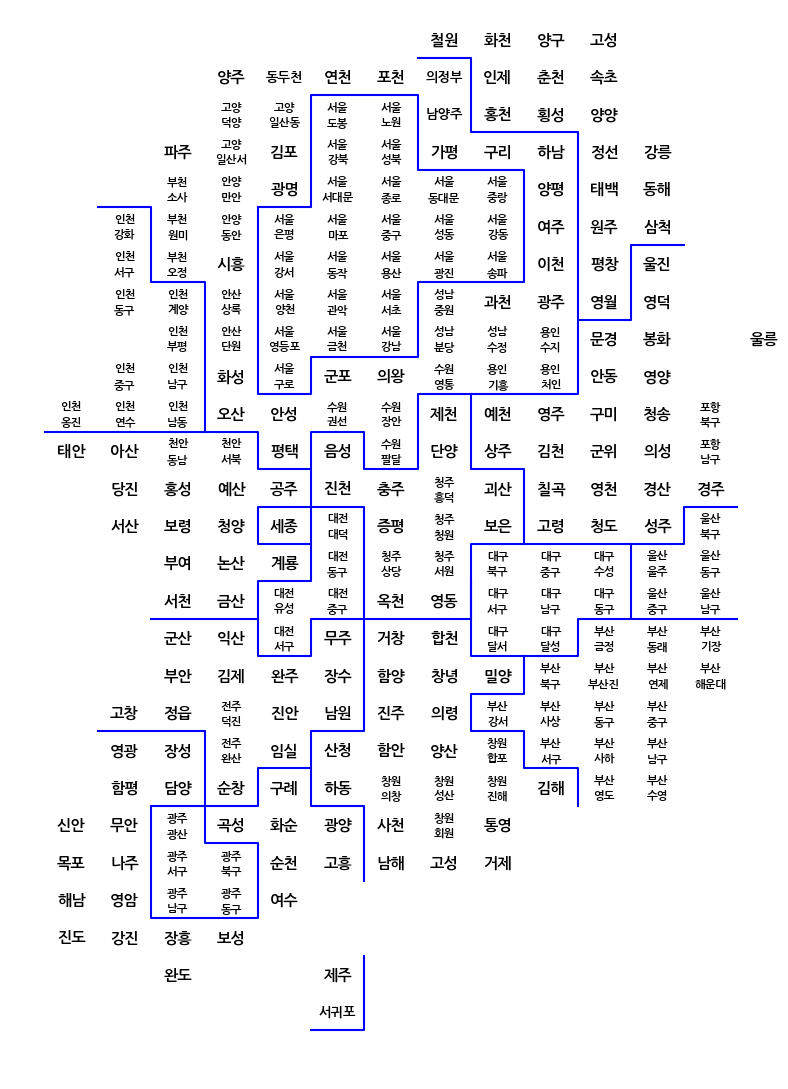

In [ ]:
## 지도 그리기 ##

plt.figure(figsize=(8, 11))   # matpolib으로 가로 8 세로 11 그림 생성

# 지역 이름 표시
for idx, row in draw_korea.iterrows():      # draw_korea의 행과 그 행의 인덱스를  반복
  # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (ex : 중구, 서구)
  if len(row['ID'].split())==2:                                                   # ID값이 두 음절이면 (ex : 대구 중구)
    dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])        # 공백을 줄바꿈으로
  elif row['ID'][:2]=='고성':                                                     # 앞 두글자가 고성이면 그냥 고성으로 처리
    dispname = '고성'
  else:
    dispname = row['ID']                                                          # 나머진 그대로 처리

  # 줄바꿈된 마지막줄이 3자이상인 경우와 아닌 경우 폰트사이즈, 줄간격 설정
  if len(dispname.splitlines()[-1]) >= 3:
    fontsize, linespacing = 9.5, 1.5
  else:
    fontsize, linespacing = 11, 1.2

  if '\n' in dispname:
    fontsize, linespacing = 8.2, 1.5

  # 지역 이름을 좌표에 표시. bold체로 가운데 정렬
  plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                fontsize=fontsize, ha='center', va='center',
                linespacing=linespacing)

# 시도 경계를 그린다. 검정 두께 1.5
for path in BORDER_LINES:
  ys, xs = zip(*path)
  plt.plot(xs, ys, c='blue', lw=1.5)

plt.gca().invert_yaxis()  # y축 뒤집기
plt.axis('off')           # 눈금 제거
plt.tight_layout()        # 레이아웃 조정
plt.show()

In [ ]:
# 차집합 : draw_korea의 ID 열에는 있으나 pop의 ID열에는 없는 것
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())

set()

In [ ]:
# 위와 반대. 해당 도시명들은 좌표데이터가 없으므로 삭제해야한다.
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())

{'고양', '부천', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

In [ ]:
# tmp_list : 시도 - Id 차집합 리스트 생성
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

# tmp_list에 있는 값과 같은 인덱스는 pop에서 제거한다.
for tmp in tmp_list:
  pop = pop.drop(pop[pop['ID']==tmp].index)

# 잘 제거됐는지 확인. 뜨는게 없어야한다.
print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))


set()


In [ ]:
# pop 상위 5개 출력
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


In [ ]:
# POP의 ID와 draw_korea의 ID가 일치할때 왼쪽(pop)을 기준으로 컬럼 병합한다.
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


In [ ]:
#열삭제. 실수로 여러번 병합했을때 열 제거
#num_cols_to_remove = 2
#pop = pop.iloc[:, :-num_cols_to_remove]
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


In [ ]:
mapdata = pop.pivot_table(index='y', columns='x', values='인구수합계') # pop의 인구수합계를 값으로 하는 2차원 피벗 테이블 생성. 앞선 draw_korea_raw와 동일
#mapdata
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)       # mapdata에서 결측치가 있는지 확인하고(NaN이면 True반환) 있으면 마스킹처리(__)

In [ ]:
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48013.0,26264.0,24010.0,30114.0,NaN,NaN,NaN
1,NaN,NaN,NaN,205513.0,98277.0,45907.0,154763.0,438457.0,32720.0,280707.0,81793.0,NaN,NaN,NaN
2,NaN,NaN,NaN,446233.0,292612.0,348220.0,567581.0,662154.0,70076.0,45991.0,27218.0,NaN,NaN,NaN
3,NaN,NaN,430781.000000,300839.0,363443.0,327195.0,450355.0,62448.0,193763.0,211101.0,38718.0,213846.0,NaN,NaN
4,NaN,NaN,283793.333333,252353.0,339484.0,314194.0,152737.0,355069.0,411005.0,111367.0,47070.0,93297.0,NaN,NaN
5,NaN,68010.0,283793.333333,345061.0,491476.0,379892.0,125249.0,299259.0,444168.0,111563.0,337979.0,69599.0,NaN,NaN
6,NaN,510733.0,283793.333333,402888.0,595485.0,400997.0,230241.0,357215.0,657831.0,210359.0,43318.0,51738.0,NaN,NaN
7,NaN,71014.0,330284.000000,375857.0,477739.0,506851.0,447192.0,237909.0,63778.0,327723.0,40073.0,39052.0,NaN,NaN
8,NaN,NaN,549716.000000,314002.0,370613.0,235386.0,567115.0,503830.0,232841.0,347833.0,74702.0,33539.0,NaN,10001.0


In [ ]:
masked_mapdata

masked_array(
  data=[[--, --, --, --, --, --, --, 48013.0, 26264.0, 24010.0, 30114.0,
         --, --, --],
        [--, --, --, 205513.0, 98277.0, 45907.0, 154763.0, 438457.0,
         32720.0, 280707.0, 81793.0, --, --, --],
        [--, --, --, 446233.0, 292612.0, 348220.0, 567581.0, 662154.0,
         70076.0, 45991.0, 27218.0, --, --, --],
        [--, --, 430781.0, 300839.0, 363443.0, 327195.0, 450355.0,
         62448.0, 193763.0, 211101.0, 38718.0, 213846.0, --, --],
        [--, --, 283793.3333333333, 252353.0, 339484.0, 314194.0,
         152737.0, 355069.0, 411005.0, 111367.0, 47070.0, 93297.0, --,
         --],
        [--, 68010.0, 283793.3333333333, 345061.0, 491476.0, 379892.0,
         125249.0, 299259.0, 444168.0, 111563.0, 337979.0, 69599.0, --,
         --],
        [--, 510733.0, 283793.3333333333, 402888.0, 595485.0, 400997.0,
         230241.0, 357215.0, 657831.0, 210359.0, 43318.0, 51738.0, --,
         --],
        [--, 71014.0, 330284.0, 375857.0, 477739.0, 50

In [ ]:
# 지도를 시각적으로 그리는 함수정의
def drawKorea(targetData, blockedMap, cmapname):  # 열 이름, 데이터프레임, 컬러

    # 크기와 글자 색상등을 설정
    gamma = 0.75
    whitelabelmin = (max(blockedMap[targetData]) -
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])
    datalabel = targetData
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    #시각화를 위한 피벗 테이블 생성
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    # 지도 색상설정
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname,
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 설정(위와 동일)
    for idx, row in blockedMap.iterrows():
        # 글자, 고성 및 나머지 도시명 설정
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 3글자 이상 도시명 크기 조정
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그리기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

<ipython-input-34-c98e02db46dc>:52: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink=.1, aspect=10)


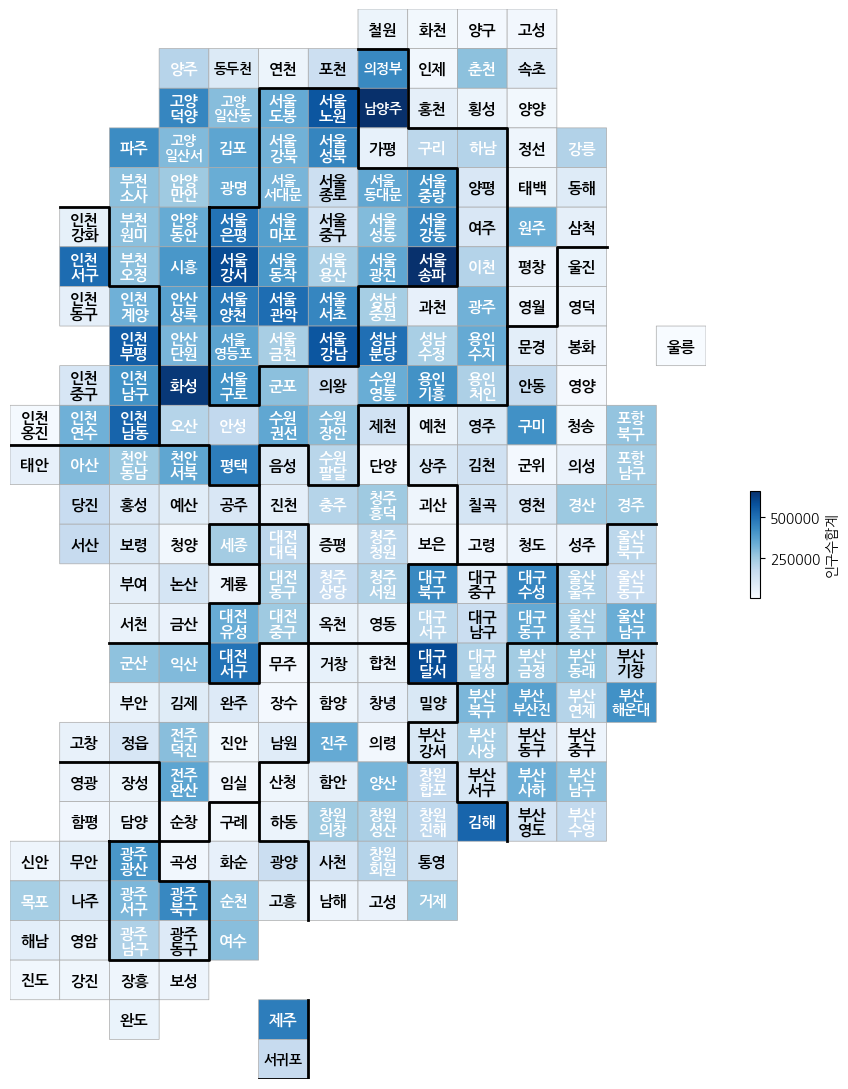

In [ ]:
#파란색으로 시각화
drawKorea('인구수합계', pop, 'Blues')

<ipython-input-34-c98e02db46dc>:52: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink=.1, aspect=10)


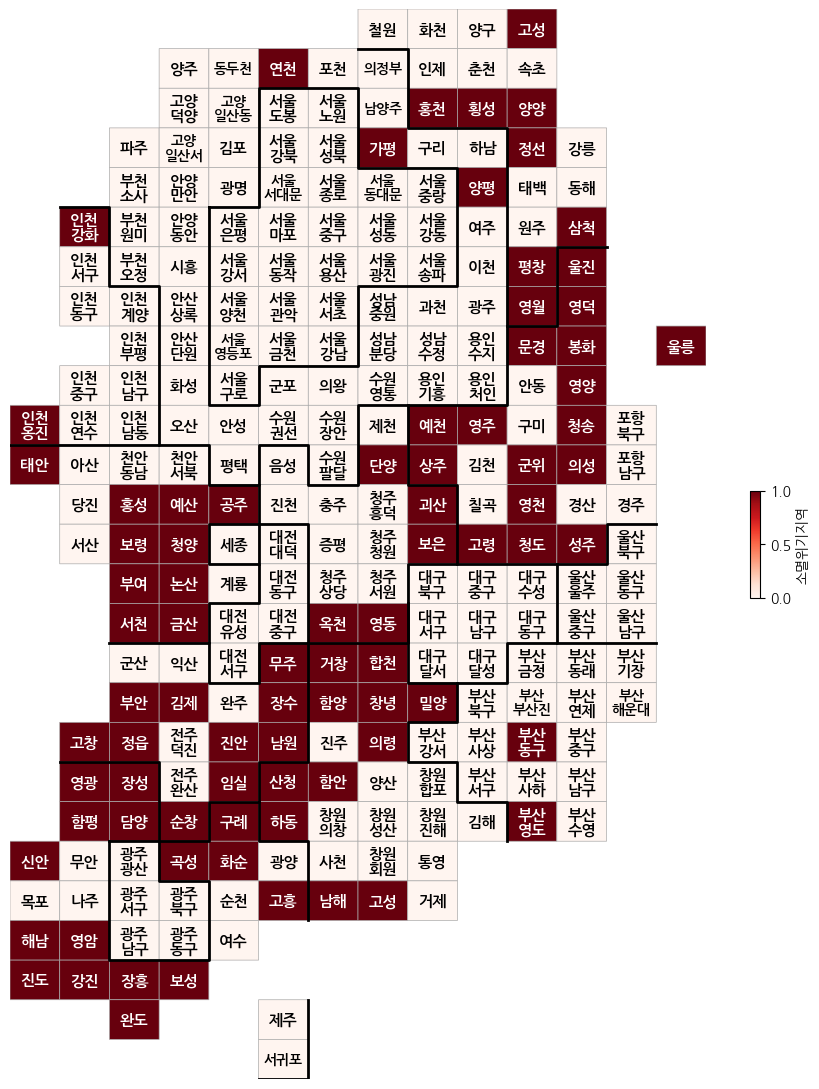

In [ ]:
# pop에서 소멸위기인 지역은 1 또는 0으로 반환하고
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')


In [ ]:
#지도 생성 함수 소멸비율에 따른 색상조정 추가
def drawKorea(targetData, blockedMap, cmapname):
    # 크기와 글자 색상등을 설정. 색상의 범위 추가
    gamma = 0.75
    whitelabelmin = 20.
    datalabel = targetData
    tmp_max = max([ np.abs(min(blockedMap[targetData])),
                                  np.abs(max(blockedMap[targetData]))]) #절대값
    vmin, vmax = -tmp_max, tmp_max

    #시각화를 위한 피벗 테이블 생성
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    # 지도 색상설정
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname,
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 설정(위와 동일)
    for idx, row in blockedMap.iterrows():
        # 글자, 고성 및 나머지 도시명 설정
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 3글자 이상 도시명 크기 조정
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

In [ ]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,속초,1,10


<ipython-input-37-2b84ea1ee533>:50: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink=.1, aspect=10)


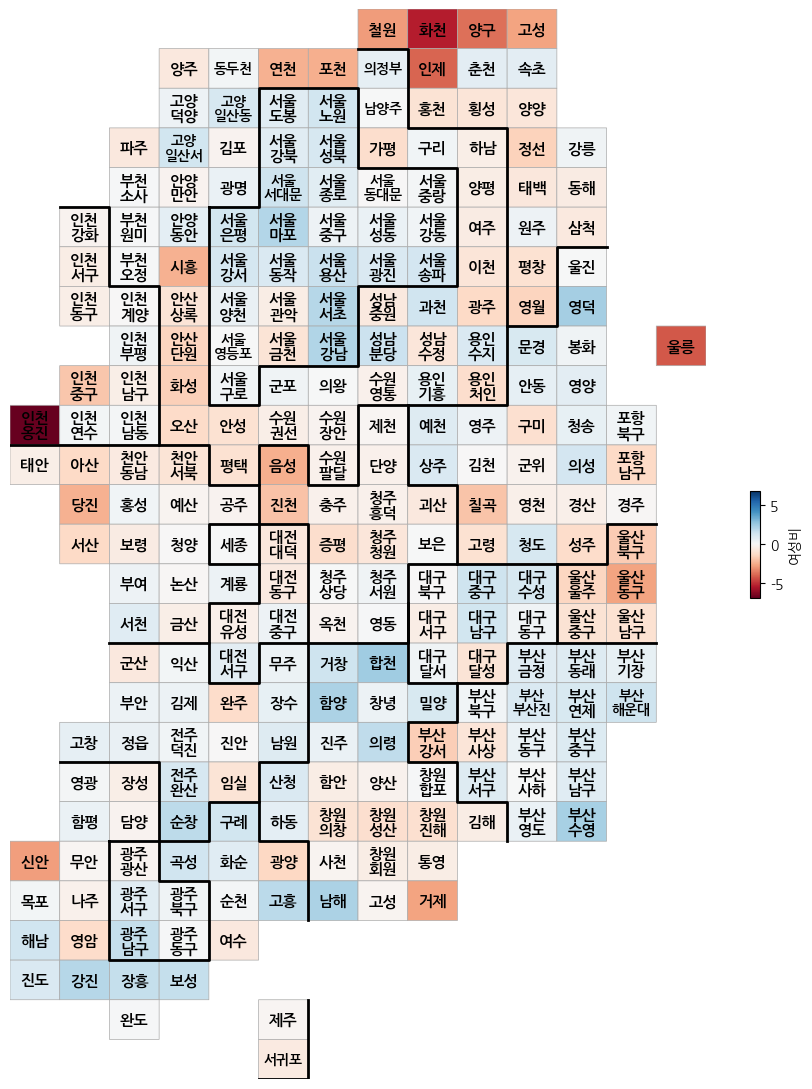

In [ ]:
# 0.5(50%)기준 전체 여성비율
pop['여성비'] = (pop['인구수여자']/pop['인구수합계'] - 0.5)*100
drawKorea('여성비', pop, 'RdBu')

<ipython-input-37-2b84ea1ee533>:50: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink=.1, aspect=10)


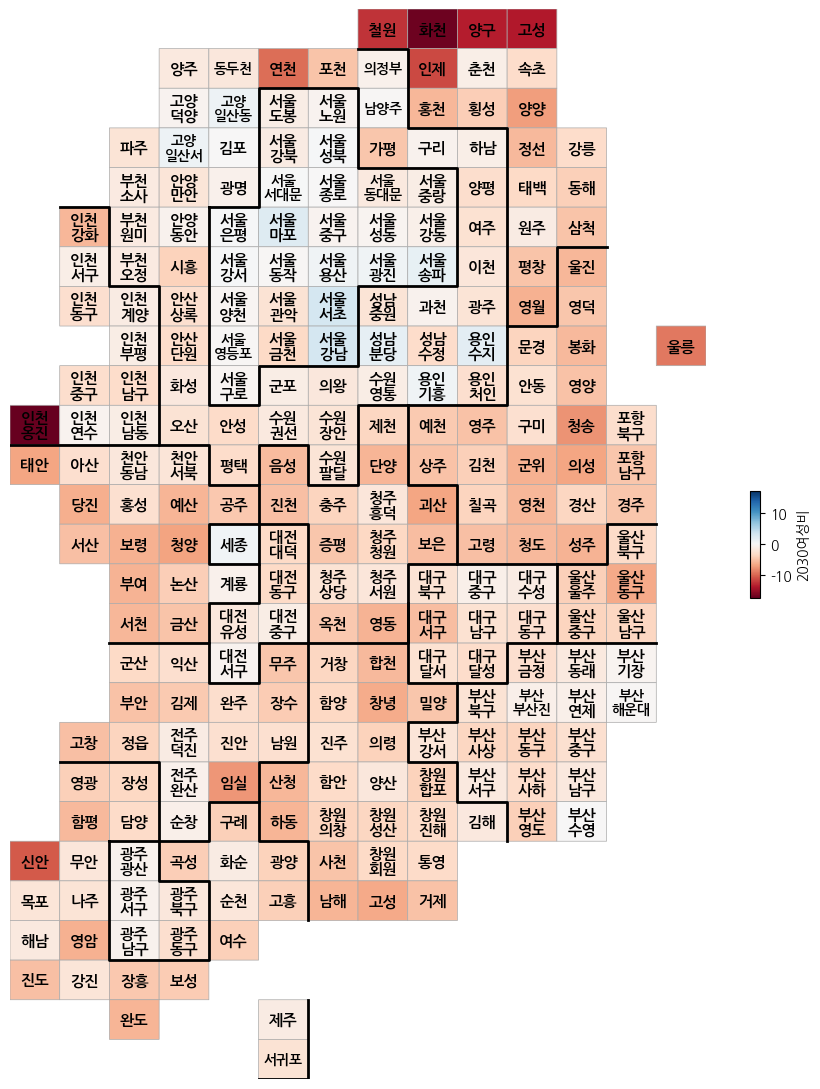

In [ ]:
#2030중 여성비율
pop['2030여성비'] = (pop['20-39세여자']/pop['20-39세합계'] - 0.5)*100
drawKorea('2030여성비', pop, 'RdBu')

In [ ]:
# ID열을 인덱스로 지
pop_folium = pop.set_index('ID')
pop_folium.head(10)

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11,0.323597,-3.227766
고성(강원),강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10,-2.796042,-13.989748
동해,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11,-0.554680,-4.133747
삼척,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11,-0.651590,-5.033812
속초,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10,0.743951,-3.217875
양구,강원도,양구군,2481.0,6849.0,4108.0,12918.0,11092.0,24010.0,1.207887,0,0,9,-3.802582,-13.775734
양양,강원도,양양군,2171.0,5087.0,6981.0,13838.0,13380.0,27218.0,0.621974,1,2,10,-0.841355,-7.322587
영월,강원도,영월군,3134.0,7159.0,9915.0,20652.0,19421.0,40073.0,0.632173,1,7,10,-1.535947,-6.222936
원주,강원도,원주시,43164.0,88919.0,42246.0,167854.0,170125.0,337979.0,2.043460,0,5,10,0.335968,-1.456944


In [ ]:
# 지리 데이터 시각화 라이브러리 folium, 데이터를 읽을 json, 경고메시지 무시를 위한 경고 메시지제어 라이브러리
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# 지리 좌표가져오기
geo_path = '/content/drive/MyDrive/Colab Notebooks/numpy_pandas+matpolib/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

#인구합계 지도
# location : 지리 중심좌표, zoom_start : 확대 정도
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
folium.Choropleth(geo_data = geo_str,
               data = pop_folium['인구수합계'],
               columns = [pop_folium.index, pop_folium['인구수합계']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id').add_to(map)

map

In [ ]:
#소멸위기지역 지도
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
folium.Choropleth(geo_data = geo_str,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id').add_to(map)

map

In [ ]:
draw_korea.to_csv("/content/drive/MyDrive/Colab Notebooks/numpy_pandas+matpolib/05. draw_korea.csv", encoding='utf-8', sep=',')